**MOVING AVERAGE**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
wsb_df = pd.read_csv('wsb.csv')
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


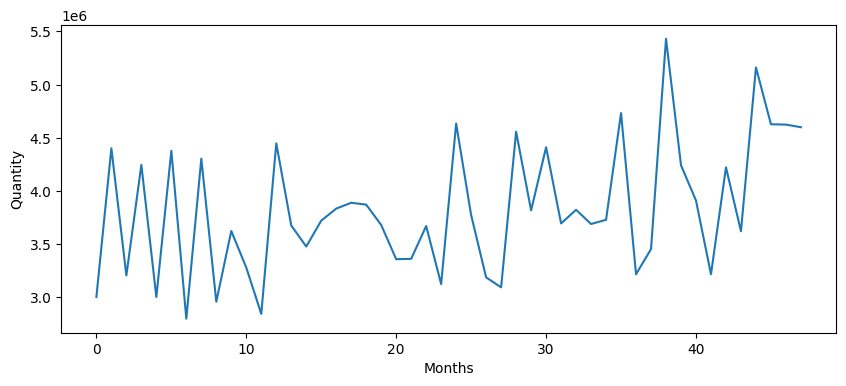

In [6]:
plt.figure(figsize=(10, 4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'])

In [9]:
wsb_df

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12
0,1,3002666,105,1,NaN
1,2,4401553,145,0,NaN
2,3,3205279,118,1,NaN
3,4,4245349,130,0,NaN
4,5,3001940,98,1,NaN
5,6,4377766,156,0,NaN
6,7,2798343,98,1,NaN
7,8,4303668,144,0,NaN
8,9,2958185,112,1,NaN
9,10,3623386,120,0,NaN


In [7]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [8]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window=12).mean().shift(1)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


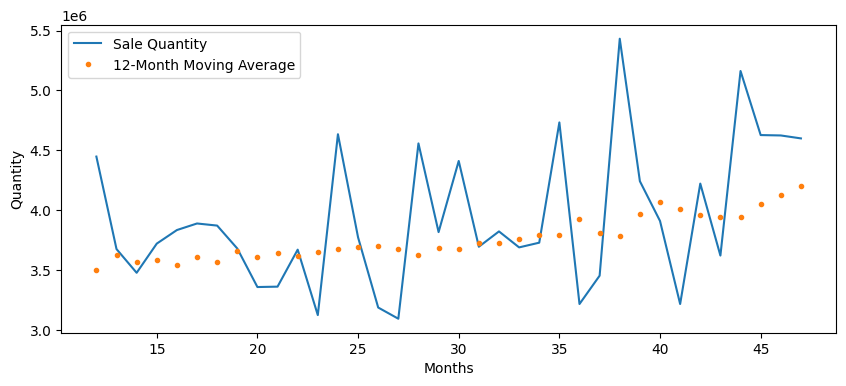

In [11]:
plt.figure(figsize=(10, 4))
plt.xlabel("Months")
plt.ylabel("Quantity")

# Assign labels for the legend
plt.plot(wsb_df['Sale Quantity'][12:], label="Sale Quantity")
plt.plot(wsb_df['mavg_12'][12:], '.', label="12-Month Moving Average")

plt.legend()
plt.show()

**Mean Absolute Percentage Error**

In [13]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

get_mape(wsb_df['Sale Quantity'][36:].values, wsb_df['mavg_12'][36:].values)

np.float64(14.04)

**Root Mean Square Error**

In [14]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values, wsb_df['mavg_12'][36:].values))

np.float64(734725.8359239782)

In [15]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha=0.2).mean()
pd.options.display.float_format = '{:.2f}'.format
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [16]:
get_mape(wsb_df[['Sale Quantity']][36:].values, wsb_df[['ewm']][36:].values)

np.float64(11.15)

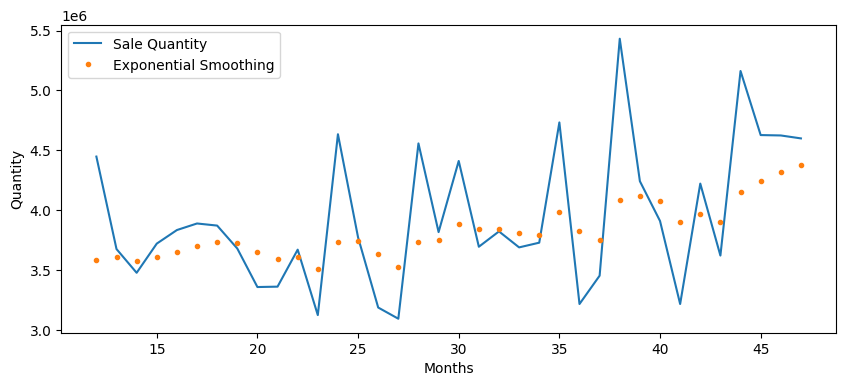

In [17]:
plt.figure(figsize=(10, 4))
plt.xlabel("Months")
plt.ylabel("Quantity")

# Assign labels for the legend
plt.plot(wsb_df['Sale Quantity'][12:], label="Sale Quantity")
plt.plot(wsb_df['ewm'][12:], '.', label="Exponential Smoothing")

plt.legend()
plt.show()

**Decomposing Time Series**

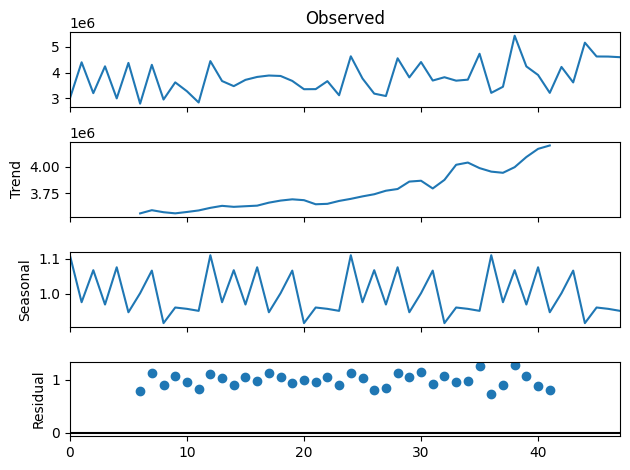

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']), model='multiplicative', period=12)

ts_plot = ts_decompose.plot()

In [21]:
wsb_df['seasonal'] = ts_decompose.seasonal
wsb_df['trend'] = ts_decompose.trend

**AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE MODELS**

In [23]:
vimana_df = pd.read_csv('vimana.csv')
vimana_df.head()

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [24]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 724.0 bytes


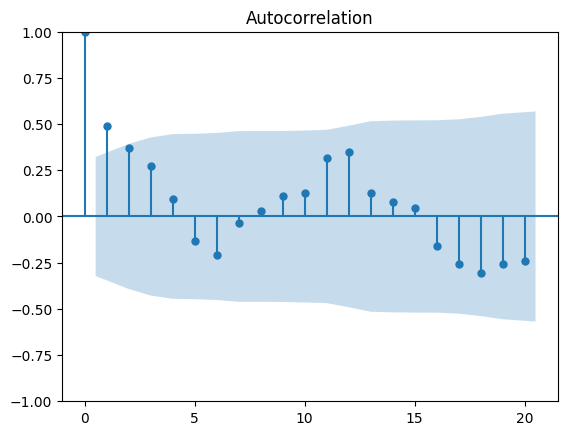

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Show autocorrelation upto lag 20
acf_plot = plot_acf(vimana_df.demand, lags=20)

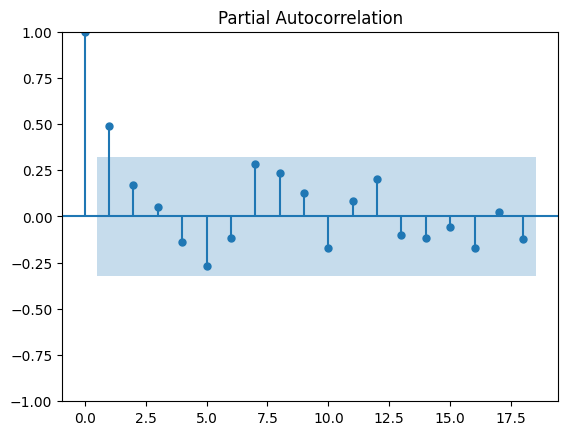

In [31]:
pacf_plot = plot_pacf(vimana_df.demand, lags=18)

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Get the first 30 values as float64 array
demand_data = vimana_df.demand[0:30].astype(np.float64).values

# Fit ARIMA(1,0,0) model (i.e., AR(1))
arima = ARIMA(demand_data, order=(1, 0, 0))
ar_model = arima.fit()

# Display summary
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Tue, 10 Jun 2025   AIC                            371.530
Time:                        23:05:08   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
forecast_31_37 = ar_model.predict(30, 36)

forecast_31_37

array([480.15275044, 497.71045556, 506.00790339, 509.92912432,
       511.78222105, 512.65796042, 513.0718187 ])

In [36]:
get_mape(vimana_df.demand[30:], forecast_31_37)

np.float64(19.12)

**Moving Average (MA) Processes**

In [38]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).values, order=(0, 0, 1))
ma_model = arima.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Tue, 10 Jun 2025   AIC                            374.595
Time:                        23:13:15   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.484      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape(vimana_df.demand[30:], forecast_31_37)

np.float64(17.78)

**ARMA Model**

In [41]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).values, order=(1, 0, 1))
arma_model = arima.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Tue, 10 Jun 2025   AIC                            371.692
Time:                        23:27:35   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     59.146      8.595      0.000     392.460     624.308
ar.L1          0.7421      0.316      2.348      0.019       0.123       1.362
ma.L1         -0.3395      0.539     -0.629      0.529      -1.397       0.718
sigma2      1.065e+04   3040.079      3.505      0.000    4696.417    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape(vimana_df.demand[30:], forecast_31_37)

np.float64(20.27)

**ARIMA MODEL**

In [5]:
store_df = pd.read_excel('store.xls')
store_df.head()

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [6]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [7]:
store_df.set_index(pd.to_datetime(store_df.Date), inplace=True)
store_df.drop('Date', axis=1, inplace=True)
store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


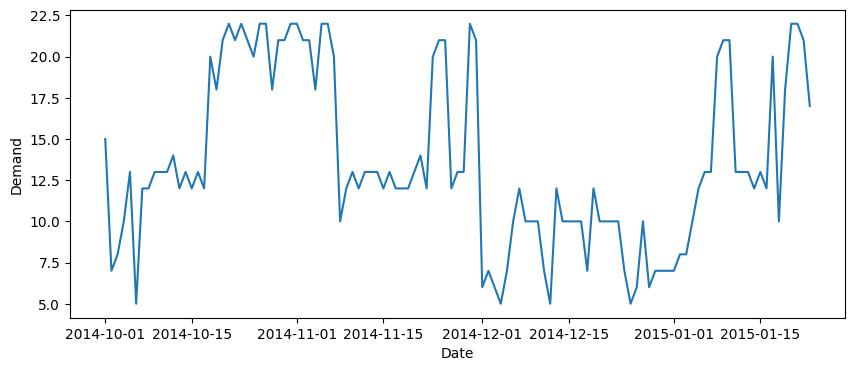

In [8]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Demand')
plt.plot(store_df.demand)
plt.show()

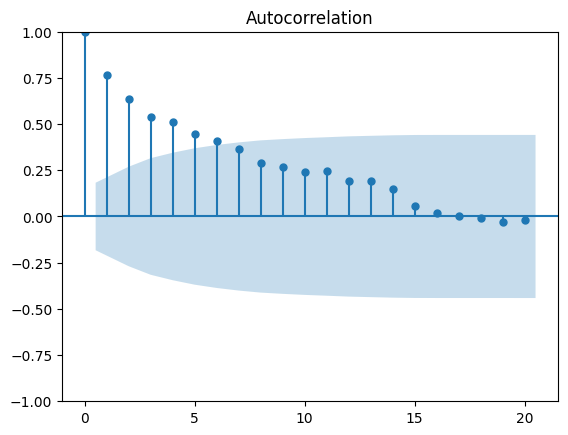

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(store_df.demand, lags=20)

The slow decline of auto-correlation for different lags indicaes that the time series is not stationary.

**Dicky-Fuller Test**

In [12]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    print(adfuller_out)

adfuller_test(store_df.demand)

Test Statistic                  -1.649533
p-value                          0.457284
Lags Used                       13.000000
Number of Observations Used    101.000000
dtype: float64


The p-value(>0.05) indicates that we cannot reject the null hypothesis and hence, the series is not stationary.

**Differencing**

In [14]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)
store_df.head(10)

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.0
2014-10-03,8,1.0
2014-10-04,10,2.0
2014-10-05,13,3.0
2014-10-06,5,-8.0
2014-10-07,12,7.0
2014-10-08,12,0.0
2014-10-09,13,1.0


In [15]:
store_diff_df = store_df.dropna()

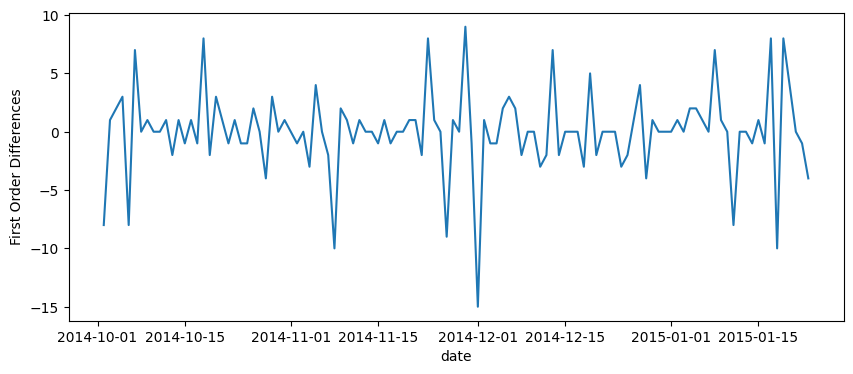

In [16]:
plt.figure(figsize=(10, 4))
plt.xlabel("date")
plt.ylabel("First Order Differences")
plt.plot(store_diff_df.demand_diff)
plt.show()

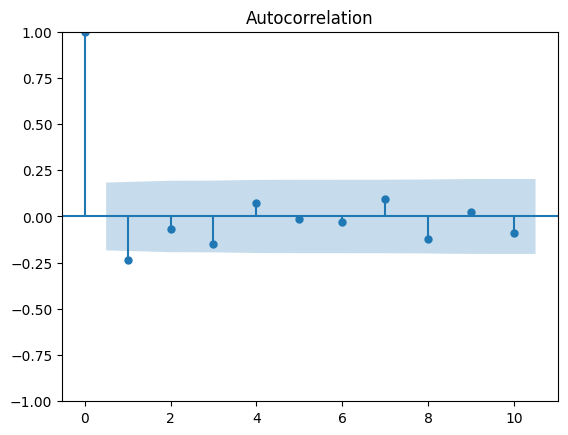

In [17]:
pacf_plot = plot_acf(store_df.demand_diff.dropna(), lags=10)

In [18]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(store_train.demand.astype(np.float64).values, order=(1, 1, 1))
arima_model = arima.fit()
arima_model.summary()

C:\Users\rahak\.virtualenvs\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.910
Date:                Wed, 11 Jun 2025   AIC                            519.821
Time:                        21:56:41   BIC                            527.606
Sample:                             0   HQIC                           522.971
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4091      0.311      1.315      0.189      -0.201       1.019
ma.L1         -0.7179      0.236     -3.039      0.002      -1.181      -0.255
sigma2        10.4865      1.026     10.223      0.000       8.476      12.497
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                75.18
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

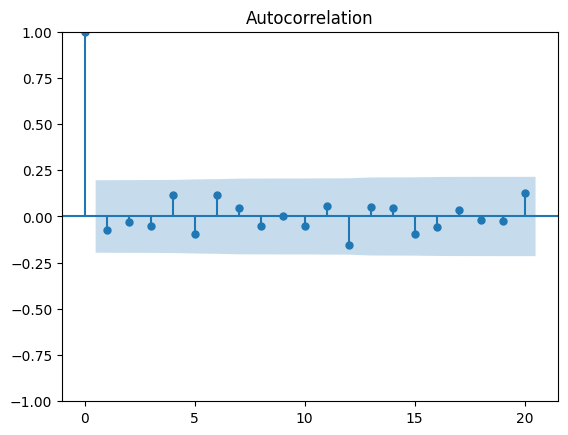

In [21]:
acf_plot = plot_acf(arima_model.resid, lags=20)

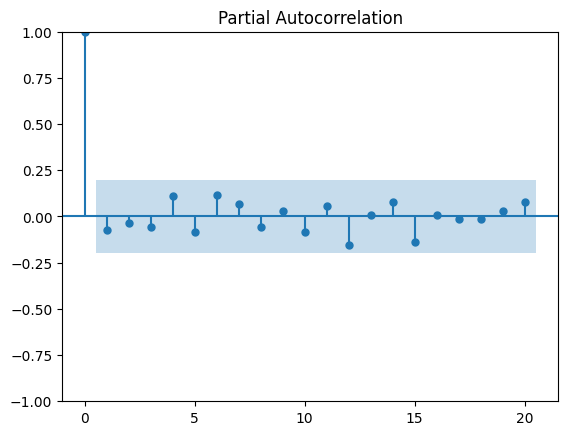

In [22]:
pacf_plot = plot_pacf(arima_model.resid, lags=20)

**Forecast and Measure Accuracy**

In [25]:
store_predict = arima_model.forecast(steps = 15)

store_predict

array([17.25076318, 16.12611914, 15.66605539, 15.47785481, 15.40086666,
       15.36937273, 15.35648935, 15.35121908, 15.34906315, 15.34818121,
       15.34782043, 15.34767285, 15.34761247, 15.34758777, 15.34757767])

In [27]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

get_mape(store_df.demand[100:], store_predict)

np.float64(24.12)